# CYBERSEC 520
# Class 1: Introduction to Machine Learning Models


#Prerequisites

This course does not presume or require any prior knowledge in machine learning.

However, to be successful in the class you should be familiar with variables, linear equations, graphs of functions, histograms, and statistical means.

You should have some familiarty with Python because the assignments and projects are in Python. If you are expereienced in other programming languages (Java, C++, Rust, etc.) you shoudl be able to easily pick up the Python needed for this course.

The following links may be helpful for a refresher.

### Algebra
* Basics such as [variables](https://www.khanacademy.org/math/algebra/x2f8bb11595b61c86:foundation-algebra/x2f8bb11595b61c86:intro-variables/v/what-is-a-variable), [coefficients](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-equivalent-exp/cc-6th-parts-of-expressions/v/expression-terms-factors-and-coefficients), and [functions](https://www.khanacademy.org/math/algebra-home/alg-functions)
* [linear equations](https://wikipedia.org/wiki/Linear_equation)
* [logarithms](https://wikipedia.org/wiki/Logarithm), and logarithmic equations.


### Statistics
* [mean, median, and outliers](https://www.khanacademy.org/math/probability/data-distributions-a1/summarizing-center-distributions/v/mean-median-and-mode)
* [standard deviation](https://wikipedia.org/wiki/Standard_deviation)
* [histograms](https://wikipedia.org/wiki/Histogram)


### Python Programming
* For a Refresher on Python you can use the [Python Tutorial](https://docs.python.org/3/tutorial/)
* Another good resource is: [Python for Data Analysis, 3rd Edition](https://wesmckinney.com/book/python-basics.html) Specifically Chapters 1-5,7 and 9
* Colab waltkthrough on [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=mlcc-prework&hl=en)
* Colab walkthrough on [Pandas](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=mlcc-prework&hl=en)


## Nice to have

Familiarity here helps but concepts will be introduced and covered as needed. I'll add in some links

### Linear Algrebra
* tensors
* matrix multiplcation

###  Trigonometry
* Tanh - used as an activation function in Neural networks

### Calculus (don't worry it won't be tested)
* concept of a derivative (you won't have to actually calculate derivatives)
* gradient or slope
* partial derivatives
* chain rule

# Notebook Setup




In [ ]:
# Google Colab only:  mount your drive to access your data files.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Calling in some additional libraries

In [ ]:
# This installs
!pip install umap-learn[plot]
#!pip install holoviews
#!pip install -U ipykernel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.2 MB/s eta 0:00:00


In [ ]:
# import the libraries.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### Numpy

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
[https://numpy.org/](https://numpy.org/)

### Matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. [https://matplotlib.org/](https://matplotlib.org/)


### seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
[https://seaborn.pydata.org/](https://seaborn.pydata.org/)

### pandas

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. [https://pandas.pydata.org/](https://pandas.pydata.org/)

### Scikit Learn
Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities. [https://scikit-learn.org/](https://scikit-learn.org/)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import umap
reducer = umap.UMAP()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to a more visually appealing preset
#plt.style.use('seaborn')

# Further customize the style
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.facecolor': '#f0f0f0',
    'axes.edgecolor': '#333333',
    'axes.labelcolor': '#333333',
    'figure.facecolor': 'white',
    'grid.color': '#888888',
    'grid.linestyle': ':',
    'text.color': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'lines.linewidth': 2,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
})

# Set a color palette
sns.set_palette("deep")

print("Matplotlib style has been set for all subsequent plots.")

Matplotlib style has been set for all subsequent plots.


# Machine Learning at its most simple


## It starts with Data

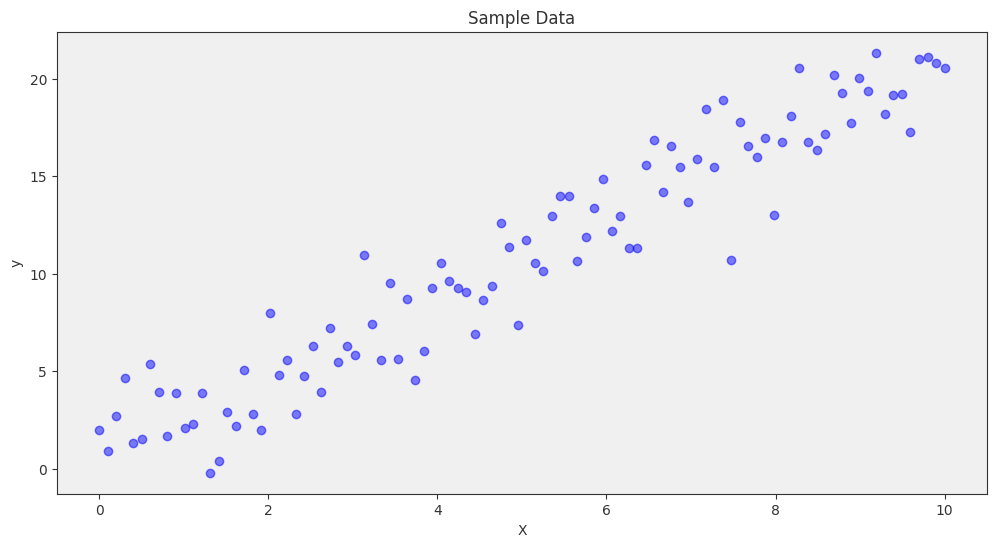

In [ ]:
# Generate sample data
np.random.seed(42)

# We want the y values to be correlated to the X but with some variation
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 2


# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

#Label the Plot
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample Data')

#Display the plot
plt.show()

## Then you need an outcome

What do you want to achieve? What is the end goal? In regression we may want to predict something.

In [ ]:
from ipywidgets import interactive, FloatSlider

def plot_regression_line(slope, intercept):
    # Clear previous plot
    plt.clf()

    # Plot data points
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

    # Plot regression line
    y_pred = slope * X + intercept
    plt.plot(X, y_pred, color='red', label='Regression line')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Interactive Linear Regression')

    # Show plot
    plt.show()

# Create interactive plot
interactive_plot = interactive(plot_regression_line,
                               slope=FloatSlider(min=-5, max=5, step=0.05, value=0),
                               intercept=FloatSlider(min=-10, max=10, step=0.05, value=0))

# Display the interactive plot
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0, step=0.05), FloatSlider(v…

## But how do we know that is a good fit?
We need a metric for how well we fit it.  

## The Loss Function or Error Function

One of the most common in Regression Problems is the

MEAN SQUARED ERROR :


## $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$



MSE:

* Heavily penalizes large errors
* Sensitive to outliers
* Commonly used in linear regression item
  

### Lets go back to our visualization

In [ ]:
# Let's modify our function

def plot_regression_line(slope, intercept):
    # Clear previous plot
    plt.clf()

    # Plot data points
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

    # Plot regression line
    y_pred = slope * X + intercept
    plt.plot(X, y_pred, color='red', label='Regression line')

## Added in the calculation and display for MSE

    # Calculate and display MSE
    mse = mean_squared_error(y, y_pred)
    plt.text(0.05, 0.95, f'MSE = {mse:.2f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Plot prediction errors
    for i in range(len(X)):
        plt.plot([X[i], X[i]], [y[i], y_pred[i]], 'g-', alpha=0.3)

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Interactive Linear Regression')

    # Show plot
    plt.show()

# Create interactive plot
interactive_plot = interactive(plot_regression_line,
                               slope=FloatSlider(min=-5, max=5, step=0.05, value=0),
                               intercept=FloatSlider(min=-10, max=10, step=0.05, value=0))

# Display the interactive plot
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0, step=0.05), FloatSlider(v…

## Let the Machine "Learn" From Data


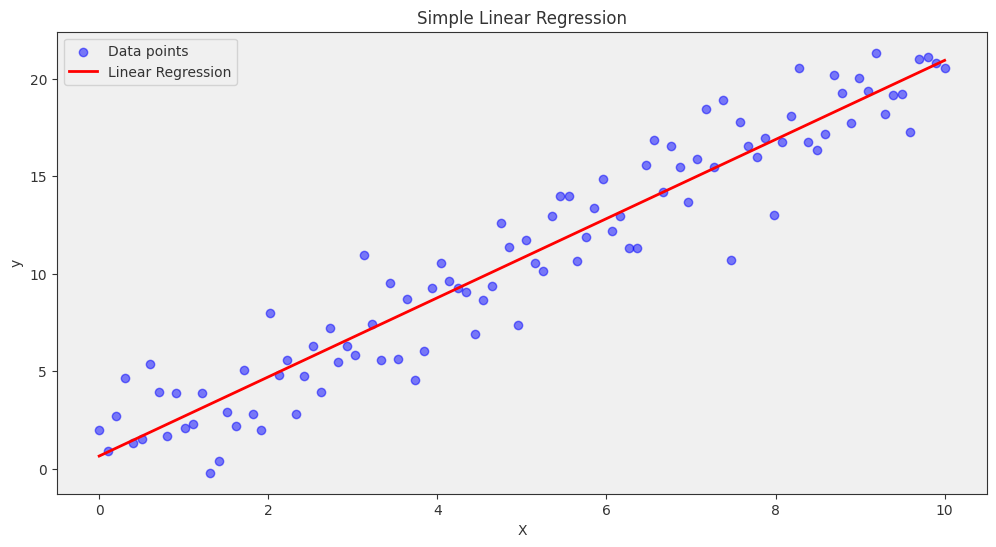

In [ ]:
# Model Creation and Training

# Create and train the model

model = LinearRegression() #select a model
model.fit(X, y) # fit it to your data

# Make predictions
y_pred = model.predict(X)


# Visualization (Code cell)
plt.figure(figsize=(12, 6))

# Data points
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

# Regression line
plt.plot(X, y_pred, color='red', label='Linear Regression')

# Labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y, y_pred)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Results
print(f"Coefficient (slope): {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Mean Squared Error (Loss): {mse:.2f}")

Coefficient (slope): 2.03
Intercept: 0.65
Mean Squared Error (Loss): 3.26


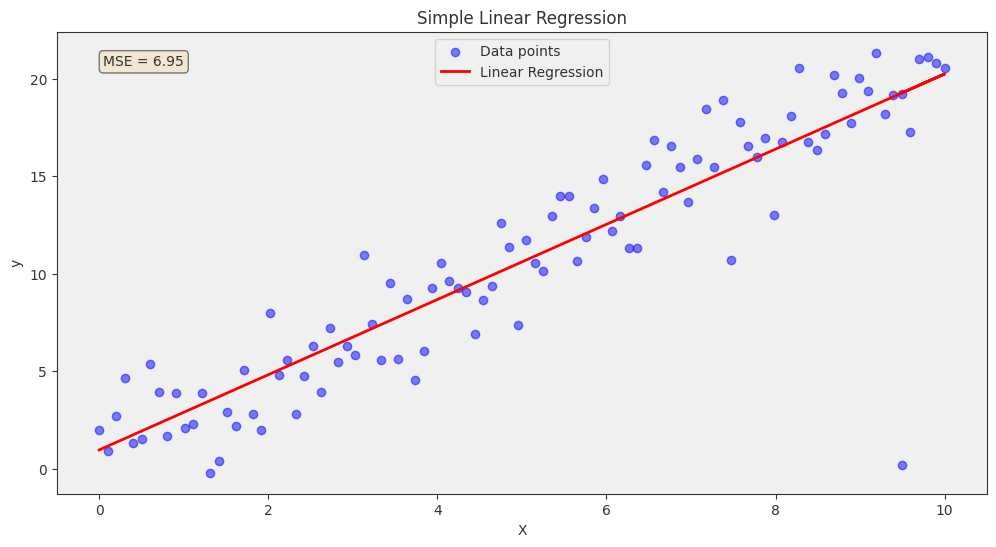

In [ ]:
# Add outlier
outlier_x, outlier_y = 9.5, 0.2
X = np.append(X, outlier_x)
y = np.append(y, outlier_y)

# Reshape X to be 2D (needed by sklearn)
X = X.reshape(-1, 1)

# Refit the model
model.fit(X, y) # fit it to your data

# Make predictions
y_pred = model.predict(X)

# Visualization (Code cell)
plt.figure(figsize=(12, 6))

# Data points
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

# Regression line
plt.plot(X, y_pred, color='red', label='Linear Regression')

# Calculate and display MSE
mse = mean_squared_error(y, y_pred)
plt.text(0.05, 0.95, f'MSE = {mse:.2f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


# Labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend(loc='upper center')
plt.show()




# Getting Data

## Data Locations

You can get your data from your google drive, or pull directly from a link

In [ ]:
# Google Colab:  mount your drive to access your data files.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Sample Data set

Simple, common intro multi-classification dataset.

In [ ]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
#examine first 5 rows
penguins.head()


,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Process (Will cover this more in-depth next Class)

![Time](https://miro.medium.com/v2/resize:fit:720/format:webp/1*cn6hbAI-TFnNnJBTcNhumA.png)

We are going to go into data exploration next lecture.  But for today we need to clean up any missing values and look at the dataset

In [ ]:
#First we want get rid of bad data
penguins = penguins.dropna()
penguins.species_short.value_counts()

,count
species_short,
Adelie,146
Gentoo,120
Chinstrap,68


## Splitting the Data


Today we are only going to look at numerical features. First we are going to drop the categorical variables and split the data into independent (X) and dependent (y) variables.


In [ ]:
# drop the categorical variables -- we will talk about how to process them next class
X_penguins = penguins.drop(['island', 'sex', 'species_short'], axis=1)
y_penguins = penguins['species_short']

# visualize to make sure we did it correctly
X_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


## Split the data into Train and Test.

![overfitting](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)


[Source](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)

Fortunately sklearn does this automatically using either an 80/20 or 75/25 train/test split. These values can be modified, But, we are going to stick with the defaults here.

*Note: Random state is used here for repeatability.  Defaults pull a random INT to initialize the state. This is good to keep in mind if you want people to help you troubleshoot so they can replicate what you have done*

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins,
                                                random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(250, 4)
(84, 4)
(250,)
(84,)


In [ ]:
print(Xtrain.head())
print(ytrain.head())

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
322              47.2             15.5              215.0       4975.0
265              43.6             13.9              217.0       4900.0
36               38.8             20.0              190.0       3950.0
308              47.5             14.0              212.0       4875.0
191              53.5             19.9              205.0       4500.0
322       Gentoo
265       Gentoo
36        Adelie
308       Gentoo
191    Chinstrap
Name: species_short, dtype: object


# Train the model

First we need to select a model.  Initially we will use K Nearest Neighbors or kNN is one of the simplest and most used classification algorithms.

kNN stores all available cases and classifies new cases based on a similarity measure (eg distance function).

![knn](https://miro.medium.com/v2/resize:fit:720/0*ItVKiyx2F3ZU8zV5)

[source](https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html)

### Let's train the model

In [ ]:
#import the model
from sklearn.neighbors import KNeighborsClassifier

#Set some of the model hyperparameters -- more on this in a minute.
model = KNeighborsClassifier(n_neighbors=3)

#Fit the model using our training data
model.fit(Xtrain, ytrain)

#Evaluate how well our model predicts outputs based on the test data set.
y_model = model.predict(Xtest)

#import evaluation metrics
from sklearn.metrics import accuracy_score

#measure accuracy
accuracy_score(ytest, y_model)

0.7857142857142857

### Enter hyperparameters

#### Question: What is a a **hyperparameter**?

In machine learning, a hyperparameter is a parameter whose value is used to **control the learning process**.

The choice of Hyperparaeters will determine the values of **model parameters**, for example, the weights, biases, etc.,that a ML algorithm ends up learning

Example:

We can change From Euclidean

$d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$

to Manhattan

$d(p, q) = \sum_{i=1}^{n} |p_i - q_i|$

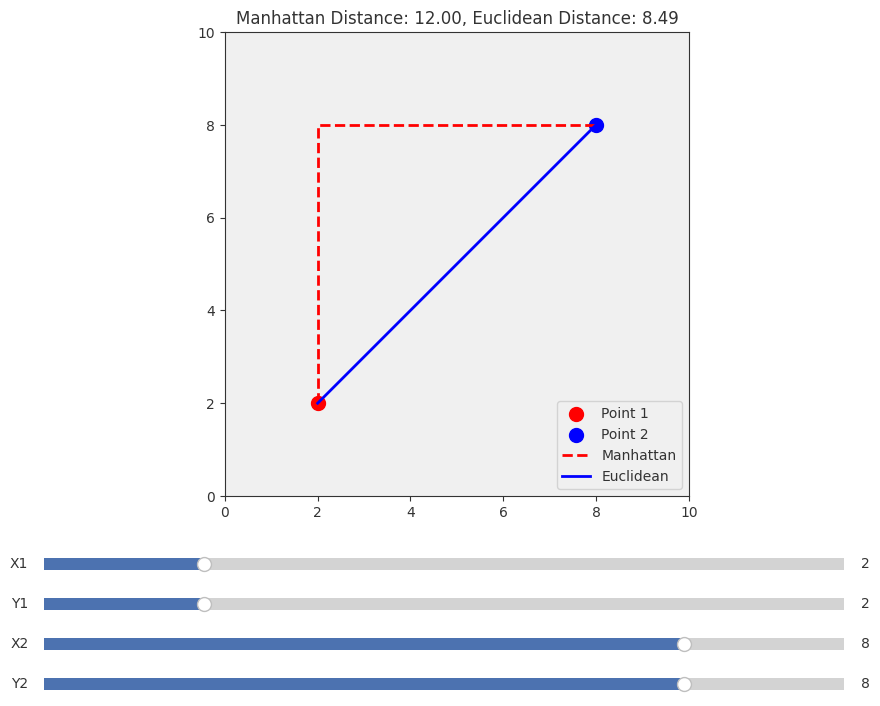

In [ ]:
from matplotlib.widgets import Slider
from IPython.display import display

def create_distance_visualization():
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.subplots_adjust(bottom=0.3)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal', adjustable='box')

    # Initial points
    point1 = [2, 2]
    point2 = [8, 8]

    # Plot points and lines
    scatter = ax.scatter(point1[0], point1[1], color='red', s=100, label='Point 1')
    scatter2 = ax.scatter(point2[0], point2[1], color='blue', s=100, label='Point 2')
    manhattan_line, = ax.plot([], [], 'r--', lw=2, label='Manhattan')
    euclidean_line, = ax.plot([], [], 'b-', lw=2, label='Euclidean')

    # Add legend
    ax.legend()

    # Function to update the plot
    def update(val):
        x1, y1 = x1_slider.val, y1_slider.val
        x2, y2 = x2_slider.val, y2_slider.val

        scatter.set_offsets([x1, y1])
        scatter2.set_offsets([x2, y2])

        manhattan_line.set_data([x1, x1, x2], [y1, y2, y2])
        euclidean_line.set_data([x1, x2], [y1, y2])

        manhattan_dist = abs(x2 - x1) + abs(y2 - y1)
        euclidean_dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

        ax.set_title(f'Manhattan Distance: {manhattan_dist:.2f}, Euclidean Distance: {euclidean_dist:.2f}')

        fig.canvas.draw_idle()

    # Create sliders
    ax_x1 = plt.axes([0.1, 0.2, 0.8, 0.03])
    ax_y1 = plt.axes([0.1, 0.15, 0.8, 0.03])
    ax_x2 = plt.axes([0.1, 0.1, 0.8, 0.03])
    ax_y2 = plt.axes([0.1, 0.05, 0.8, 0.03])

    x1_slider = Slider(ax_x1, 'X1', 0, 10, valinit=point1[0])
    y1_slider = Slider(ax_y1, 'Y1', 0, 10, valinit=point1[1])
    x2_slider = Slider(ax_x2, 'X2', 0, 10, valinit=point2[0])
    y2_slider = Slider(ax_y2, 'Y2', 0, 10, valinit=point2[1])

    # Connect update function to sliders
    x1_slider.on_changed(update)
    y1_slider.on_changed(update)
    x2_slider.on_changed(update)
    y2_slider.on_changed(update)

    # Initial update
    update(None)

    # Display the plot
    plt.show()

# Create and display the visualization
create_distance_visualization()

## So what does that look like for knn?  

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Function to plot the decision boundary
def plot_decision_boundary(clf, ax):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'k-NN (k={clf.n_neighbors})')

# Create the animation
fig, ax = plt.subplots(figsize=(10, 8))

def animate(k):
    ax.clear()
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    plot_decision_boundary(clf, ax)

anim = FuncAnimation(fig, animate, frames=range(1, 21), interval=500, repeat=True)

# Close the static figure to prevent it from displaying
plt.close(fig)

# Display the animation in the notebook
HTML(anim.to_jshtml())

In [ ]:
#number of neighbors, type of weighting and the type of algorithm are all examples of hyperparameters.
model = KNeighborsClassifier(n_neighbors=4, weights= 'distance', algorithm='brute')

#retraing the model
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)

0.8095238095238095

There we go. 3 slight tweaks to the hyperparameter settings improves the model perfromance by nearly 5 percentage points.  Or more importantly, especially for a cyber context, a 20% reduction in the error rate.

*To add to the confusion, the documentation for the models ([such as KNN](hhttps://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) often uses the term parameters to describe the hyperparamteters for the model*

### Effect of scaling data

In [ ]:
X_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Until now, **Unscaled data**.  Scaling, or **Normalization** transforms features to be on a similar scale which improves the performance and training stability of the model.


If you are measuring distance and paramaters have different scales, the larger-scaled parameters will dominate the calculation.

In [ ]:
#Scale the data
scaled_penguin_data = StandardScaler().fit_transform(X_penguins)
scaled_penguin_data[:5]

array([[-0.89765322,  0.78348666, -1.42952144, -0.57122888],
       [-0.82429023,  0.12189602, -1.07240838, -0.50901123],
       [-0.67756427,  0.42724555, -0.42960487, -1.19340546],
       [-1.33783112,  1.08883619, -0.5724501 , -0.94453483],
       [-0.86097173,  1.75042684, -0.78671793, -0.6956642 ]])

Let's visualize the effect.

It is hard to visualize multi-dimensional data. So we will first use a dimensionality reduction technique called UMAP -- there are many other ones as well. Which will reduce the higher dimensional data into 2-dimensions.

Then we will plot the results and use the species' short name to color code the results.

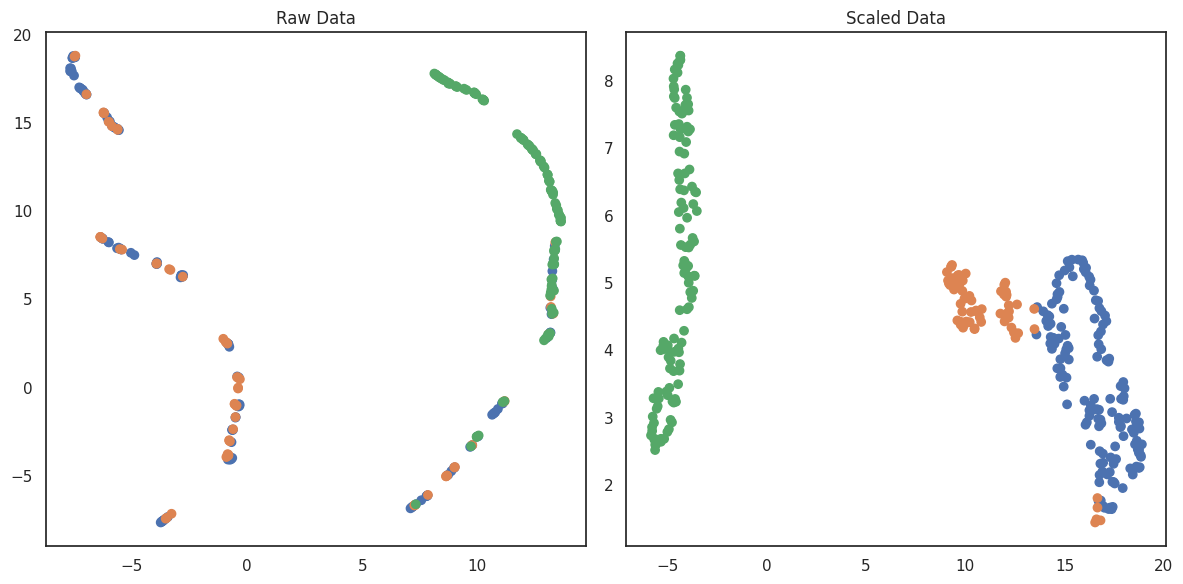

In [ ]:
#UMAP projection (2-D mapping)
embedding = reducer.fit_transform(X_penguins)
embedding_scaled = reducer.fit_transform(scaled_penguin_data)

#plotting

# Not necessary, but sets the aspect ration at 4:3 which is nice for graph visualization
sns.set(style='white', context='notebook', rc={'figure.figsize':(12,9)})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the plots
#Raw Data
ax1.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #Maps the color to each of the species.  We will use this mapping more.
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
ax1.set_title(label='Raw Data')

#scaled Data
ax2.scatter(
    embedding_scaled[:, 0],
    embedding_scaled[:, 1],
    #Maps the color to each of the species.  We will use this mapping more.
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
ax2.set_title('Scaled Data')

# Adjust spacing between plots
plt.tight_layout()

# Display the plot
plt.show()




You can see some good separation of points in the embedding plot.  But, there is some overlap of points.  Typically what you would do here is go in and look at some of the individual points to see if there is something abnormal in the data (mislabeled, decimal point error, etc.).  But, we are going to skip that.

To learn more about UMAP:  Read [The Docs](https://umap-learn.readthedocs.io/en/latest/) or [The Paper](https://arxiv.org/abs/1802.03426)



---



In [ ]:
#you can use the make_pipeline function to combine the model and scaler used.
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
accuracy_score(ytest, y_model)

1.0

[link text](https://)98.8% Acuracy and that includes lumping together male and female penguins

## Let's Visualize this


Here we are going to **take 2** columns from the **Penguins** data that we will use for visualization.

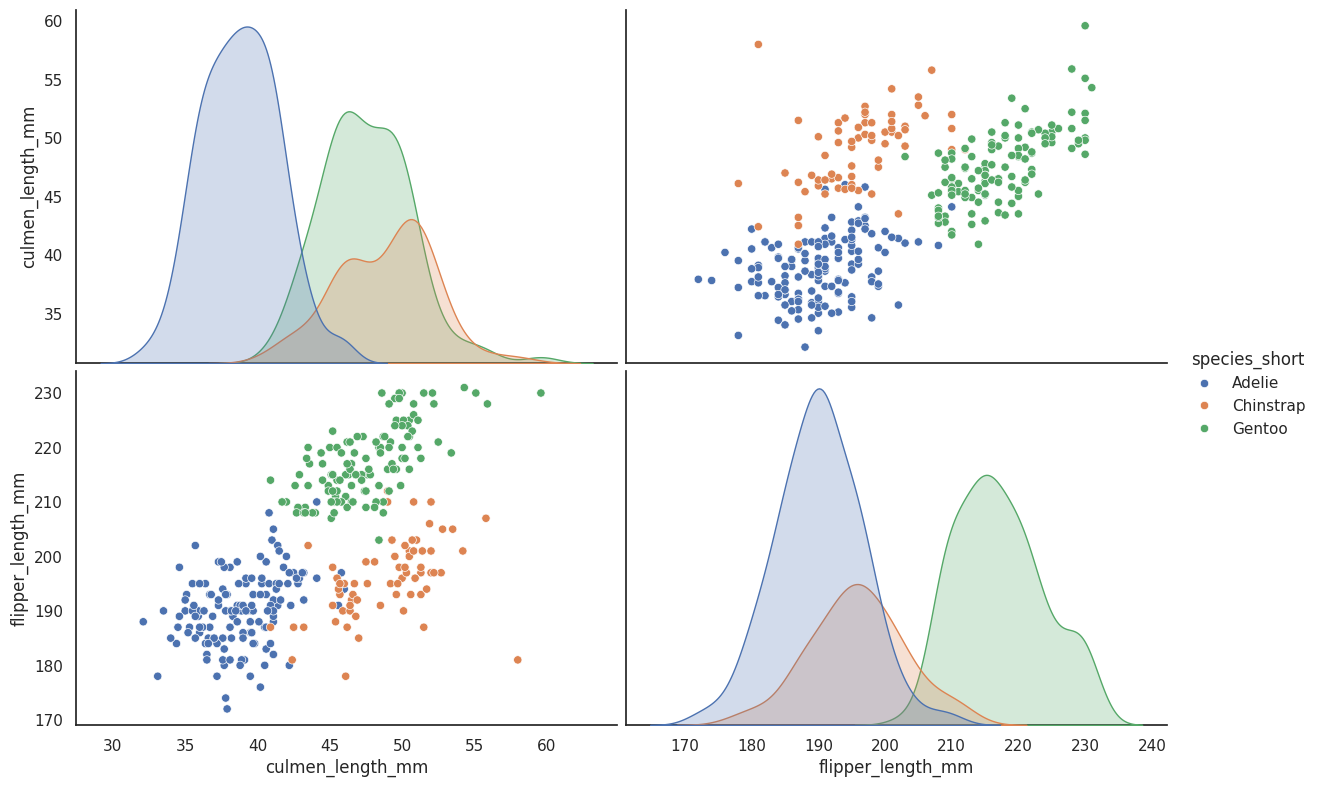

In [ ]:
#import decision region plotting
from mlxtend.plotting import plot_decision_regions
data = penguins[["culmen_length_mm","flipper_length_mm", "species_short"]]
sns.pairplot(data, hue='species_short', height=4, aspect=1.5)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Axes: >

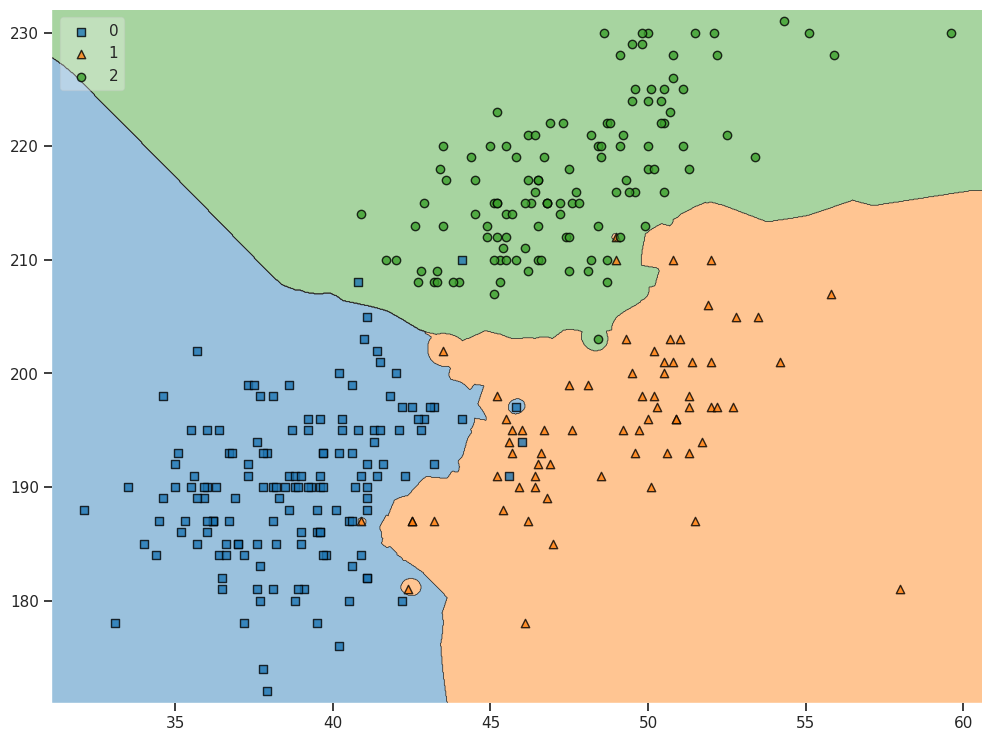

In [ ]:
X_penguins = penguins[["culmen_length_mm","flipper_length_mm"]]
y_penguins = penguins['species_short']

#getting codes
species = pd.Categorical(y_penguins).codes
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, species,
                                               random_state=1)

# clf is short for classifier - call this whatever you want.
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=4, weights= 'distance', algorithm='brute'))

#train the data
clf.fit(Xtrain, ytrain)

# plot all of the data using the decision regions.
plot_decision_regions(X_penguins.values, species, clf=clf, legend=2)

In [ ]:
y_model = clf.predict(Xtest)
accuracy_score(ytest, y_model)

0.9404761904761905

# Cyber Example

The class today uses data from the [Intrusion Detection Evaluation Dataset (CICIDS2017)](https://www.unb.ca/cic/datasets/ids-2017.html)

- The CICIDS2017 dataset contains benign and the most up-to-date (__as of 2017__) common attacks, which resembles the true real-world data (PCAPs).

- The `.csv` files used from this analysis were generated from from network traffic analysis using [CICFlowMeter](http://www.netflowmeter.ca/netflowmeter.html) feature extraction tools - Also see the [GitHub](https://github.com/ahlashkari/CICFlowMeter) repository.
  - Labeled flows based on the time stamp, source, and destination IPs, source and destination ports, protocols and attack (CSV files).

Newer datasets are available from the [Canadian Institute for Cybersecurity datasets](https://www.unb.ca/cic/datasets/index.html). They include:
- [Android Malware dataset (InvesAndMal2019)](https://www.unb.ca/cic/datasets/invesandmal2019.html)
- [DDoS dataset (CICDDoS2019)](https://www.unb.ca/cic/datasets/ddos-2019.html)
-  [IPS/IDS dataset on AWS (CSE-CIC-IDS2018)](https://www.unb.ca/cic/datasets/ids-2018.html)

A websearch will also turn up many other datasets that can be used.

In [ ]:
# I have already downloaded the DDoS dataset to my drive
ddos = pd.read_csv('drive/My Drive/CYBERSEC520/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
ddos.head(100)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.000,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.000000,...,20,0.0,0.000,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.000000,...,20,0.0,0.000,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.000000,...,20,0.0,0.000,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.000000,...,20,0.0,0.000,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,80,28466,1,1,6,6,6,6,6.0,0.000000,...,20,0.0,0.000,0,0,0.0,0.0,0,0,BENIGN
96,443,101027175,14,12,1029,991,460,0,73.5,150.040379,...,32,1048172.0,1296391.188,1964859,131485,49400000.0,12900000.0,58500000,40300000,BENIGN
97,53,330,2,2,74,198,37,37,37.0,0.000000,...,20,0.0,0.000,0,0,0.0,0.0,0,0,BENIGN
98,53,221,2,2,74,106,37,37,37.0,0.000000,...,20,0.0,0.000,0,0,0.0,0.0,0,0,BENIGN


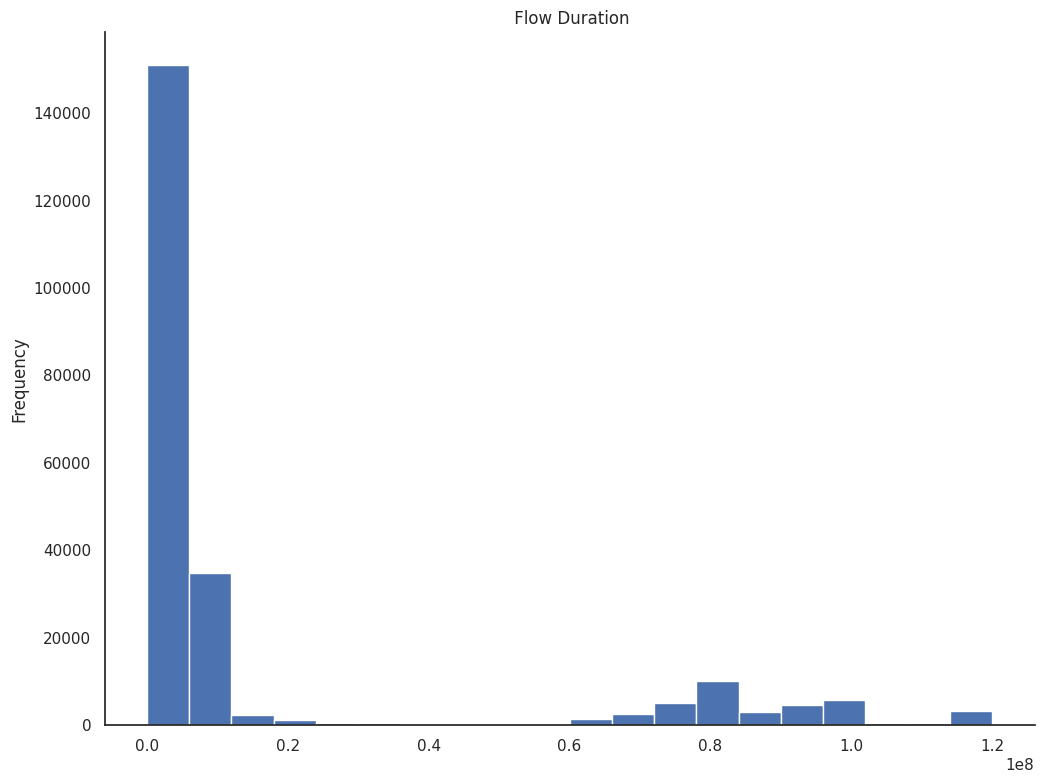

In [ ]:
from matplotlib import pyplot as plt
ddos[' Flow Duration'].plot(kind='hist', bins=20, title=' Flow Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

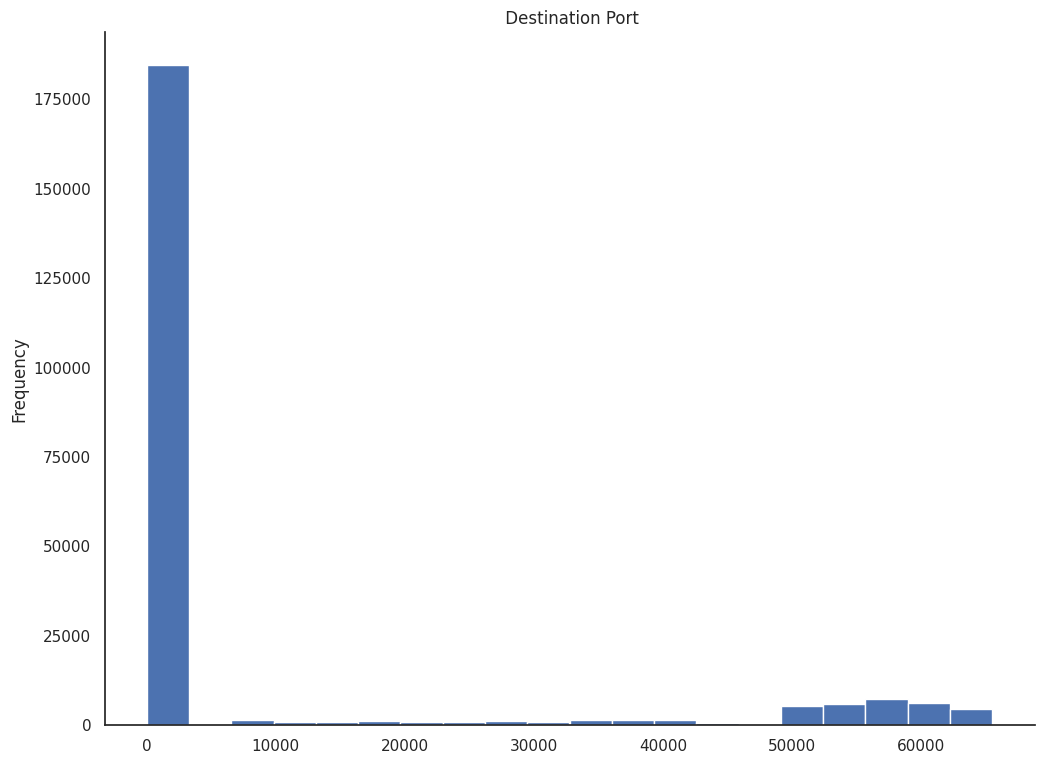

In [ ]:
from matplotlib import pyplot as plt
ddos[' Destination Port'].plot(kind='hist', bins=20, title=' Destination Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
list(ddos)

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' P

Let's make sure to remove bad data -- so get rid of any infinite (`inf` or `-inf`) or missing (`NaN`) values

In [ ]:
ddos.replace([np.inf, -np.inf], np.nan, inplace=True)
ddos = ddos.dropna()
ddos[' Label'].value_counts()

,count
Label,
DDoS,128025
BENIGN,97686


### Let's subsample the data set so that we can better visualize it.

In [ ]:
n = len(ddos)
idx = np.random.permutation(range(n))[:2000] #selects a random permutation of samples up to the number you want.
l = len(idx)
idx.sort()
small_ddos = ddos.iloc[idx[:l]]
small_ddos[' Label'].value_counts()

,count
Label,
DDoS,1137
BENIGN,863


A good thing to keep in mind is that more data is often better for model performance and improving transferability of the models.  But, it is **not** always good for initial data exploration.

### Now let's visualize the data

Text(0.5, 1.0, 'UMAP projection of the CIC 2017 dataset')

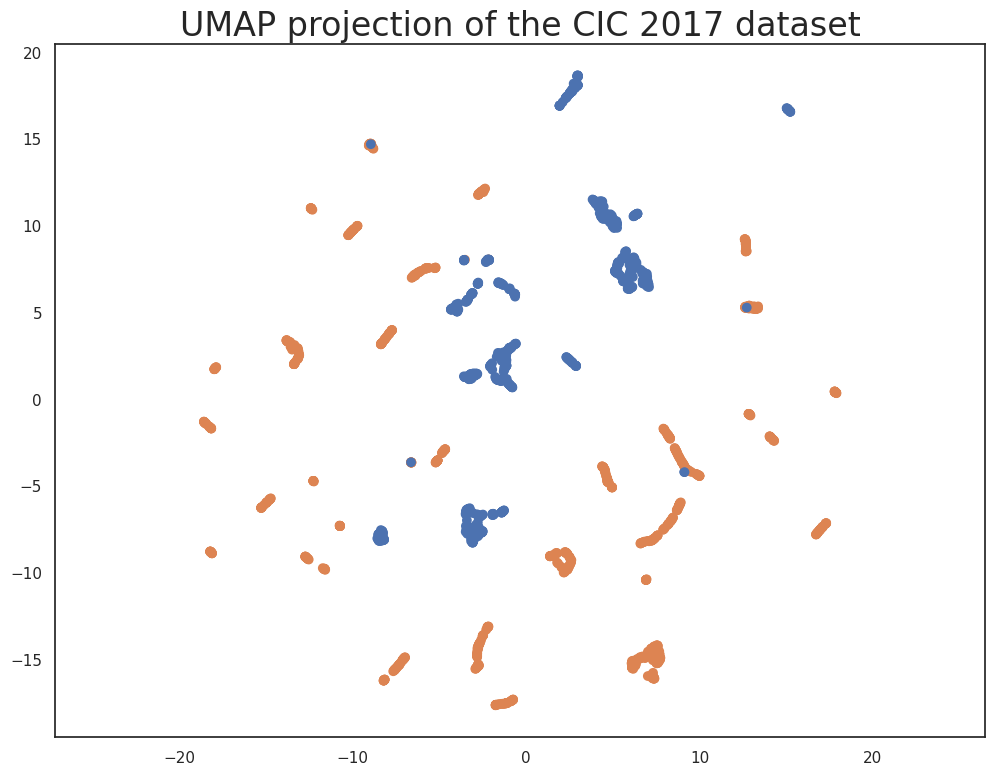

In [ ]:
#Create a new dataframe for exploration

# This is using all of the categories.
df1 = small_ddos.copy()

#y values
df2 = df1[' Label'].copy()

#remove label collumn from x values
df1.drop(columns=[' Label'], inplace=True)

#scaled data
scaled_ddos = StandardScaler().fit_transform(df1)

#Create the embeddings for visualization
embedding2 = reducer.fit_transform(scaled_ddos)
embedding2.shape

#plot the data
plt.scatter(
    embedding2[:, 0],
    embedding2[:, 1],
    ## Labels are not in the np array so we need to color code the values
    c=[sns.color_palette()[x] for x in df2.map({"BENIGN":0, "DDoS":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the CIC 2017 dataset', fontsize=24)


So this is a good candidate for a classification problem.

In [ ]:
#Let's take 2 features.
ddos_subset =  small_ddos[[ ' Fwd Packet Length Mean',
                     ' Flow Duration',
                      ' Label']].copy()
ddos_subset.head()

,Fwd Packet Length Mean,Flow Duration,Label
82,27.000000,3895966,BENIGN
260,28.673913,187229,BENIGN
271,27.854167,189539,BENIGN
499,54.000000,76881,BENIGN
546,58.000000,60992,BENIGN


In [ ]:
dfx = ddos_subset.drop(' Label', axis=1)
dfy = ddos_subset[' Label']
Xtrain, Xtest, ytrain, ytest = train_test_split(dfx, dfy,
                                                random_state=1)

clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
accuracy_score(ytest, y_model)

0.906

Now you have a ML model that detects DDoS attacks with **96.4% accuracy**.  

# Machine Learning Metrics

Accuracy is the ratio of the correct predictions to incorrect predictions. Accuracy is an easy metric to intuitively grasp. But it is not always the **Best** one to use in Machine Learning.

What do we care about in Cyber? False Positives and Missed Events.

If a malicious event is only 1 out 10,000 events,  a simple classifier that marks everything as benign will achieve an accuracy of 99.99%

What other ways can we look at model performance?

Let's print out the classification report.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

      BENIGN       0.94      0.85      0.89       223
        DDoS       0.89      0.95      0.92       277

    accuracy                           0.91       500
   macro avg       0.91      0.90      0.90       500
weighted avg       0.91      0.91      0.91       500



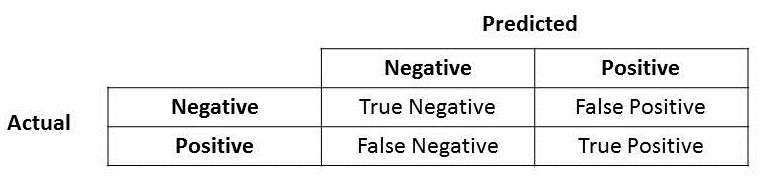

$precission = \frac{True Positive}{True Positive + False Positive}$

A higher number here means that you model does a good job of minimizing false positive rate.  

$recall = \frac{True Positive}{True Positive + False Negative}$

In the context of cyber, A higher score here will indicate how well your model does at catching all malicious behavior.  

### We can plot the actual values in each bucket

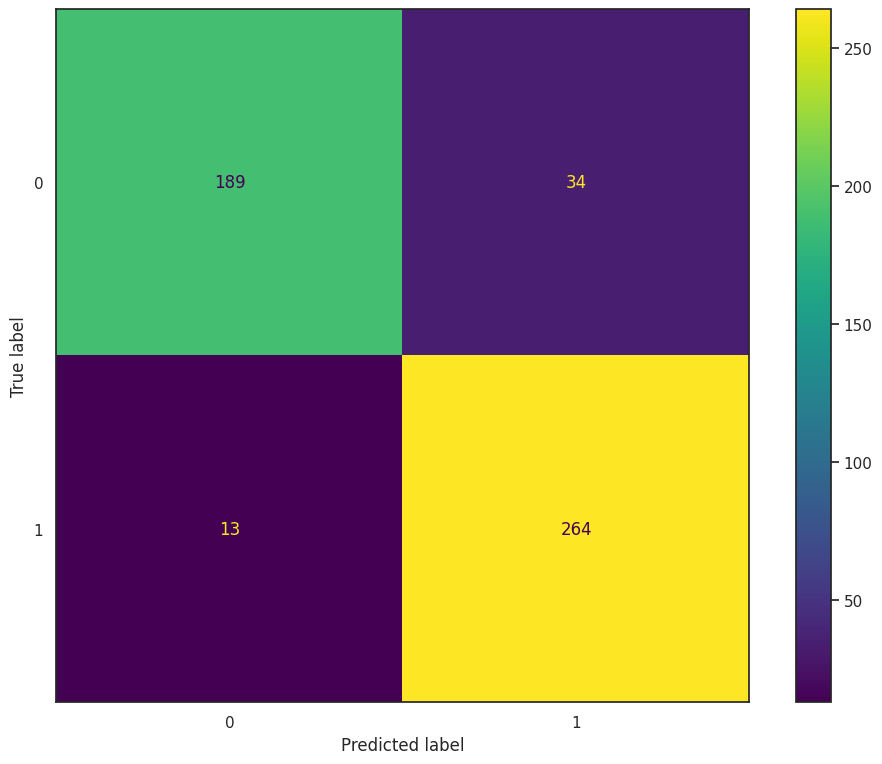

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, y_model)
cm_display = ConfusionMatrixDisplay(cm).plot()

Here zero is Benign and 1 is DDoS, so with this very limited dataset, we have 5 missed attacks and 17 false positives.

### Balance between Precision and Recall:

* Useful for Imbalanced Datasets (example fraud detection)
* Single Metric for Model Comparison
* Indication of Model Robustness

$F_1 = 2*\frac{Precision*Recall}{Precision+Recall}$


F1 Score is the harmonic mean between precision and recall.

F1 is typically used in machine learning when you want to balance Precision and Recall **AND** there is an uneven class distribution.

In some of the other data sets we will come across, there is not so cleanly a split.


There are other weighting scores, F2, F1.5, etc. that are less common but can be used when you want to weight recall hihger ($\beta >1)$ or precision higher ($\beta <1)$

$F_\beta = (1+\beta^2)*\frac{Precision*Recall}{(\beta^2 *Precision)+Recall}$

In [ ]:
from sklearn.metrics import f1_score
#f1_score(ytest, y_model)
f1_score(ytest, y_model, average='weighted')

0.905394168797954

KNN requires a LOT of human preprocessing and selction to perform well.

KNN is purely a distance measurement calculation.  So it is only looking calculating distance.  If we include parameters where measurements overlap (i.e. they are **close** to each other, then model performance will deteriorate.

## Reciever Operator Characteristic (ROC)
Visualizing model performance.  Shows the tradeoff between different thresholds in a binary classification. i.e. Benign vs DDoS.

Plots FPR vs. TPR.  The Area under the ROC Curve (AUC) is a single metric, like F1 score that can be used to compare performance.

* AUC = 1.0 -- Perfect Classifier
* AUC = 0.5 -- Random Guessing

Purposes:

* Threshold Selection:
* Model Comparison
* Imbalanced Datasets

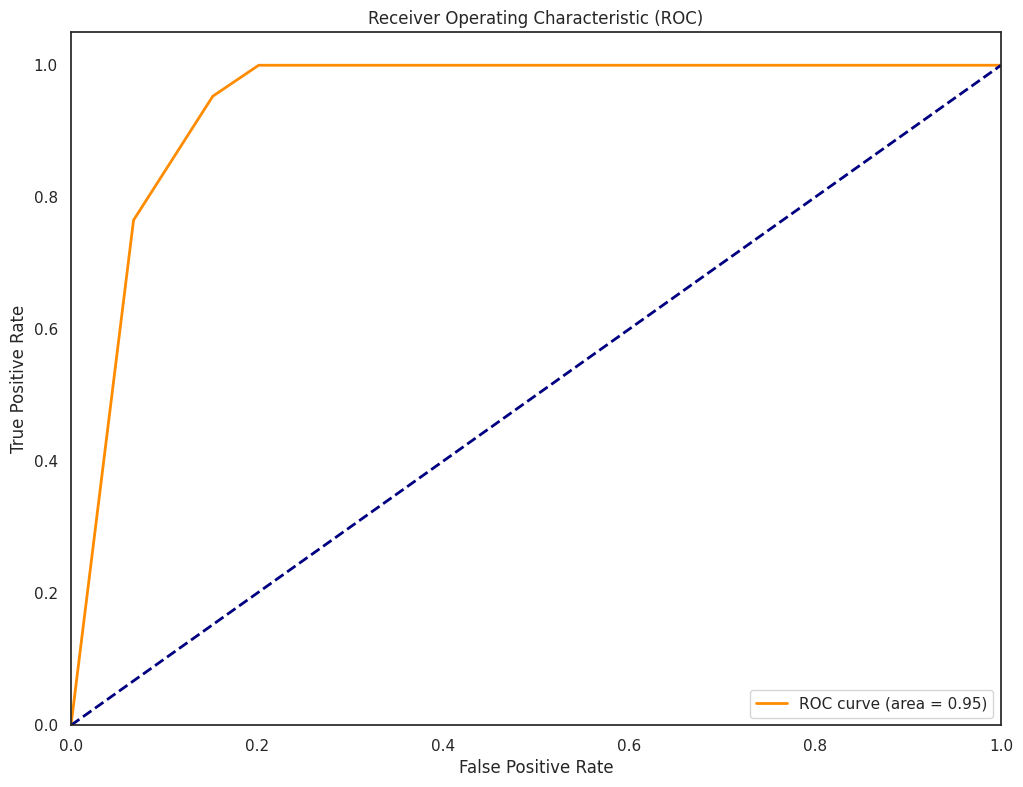

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = clf.predict_proba(Xtest)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_prob, pos_label='DDoS')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machines (SVMs)


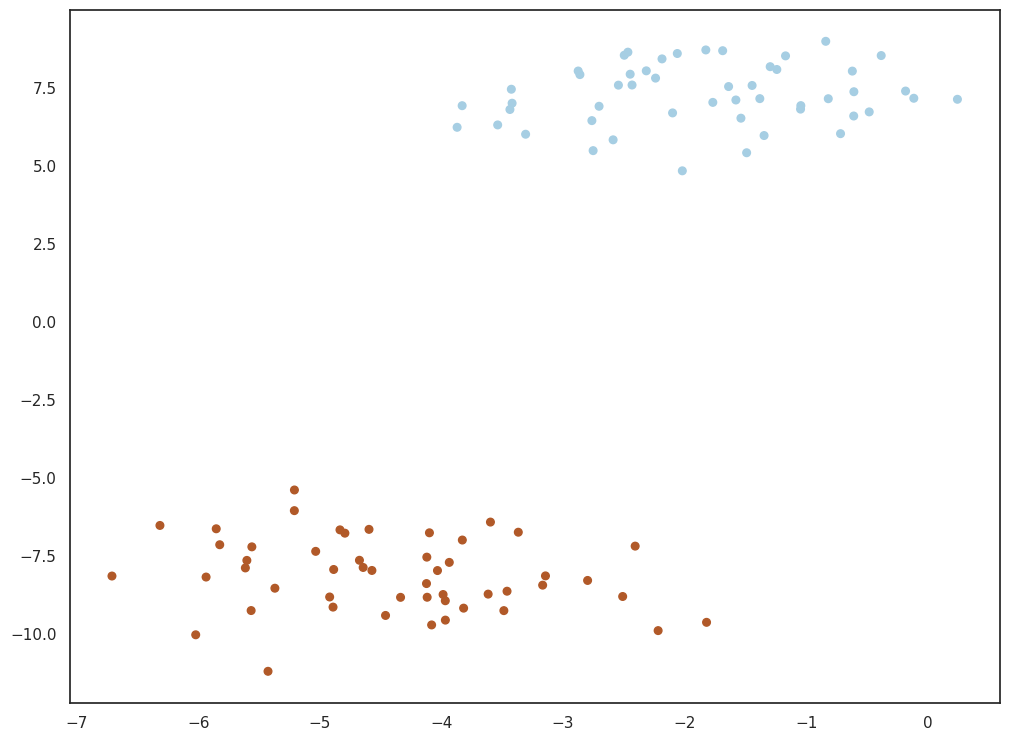

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC

# Generate a toy dataset (2D for visualization)
X, y = datasets.make_blobs(n_samples=100, centers=2)

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

plt.show()

![SVM](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*06GSco3ItM3gwW2scY6Tmg.png)

[*source*](https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f)

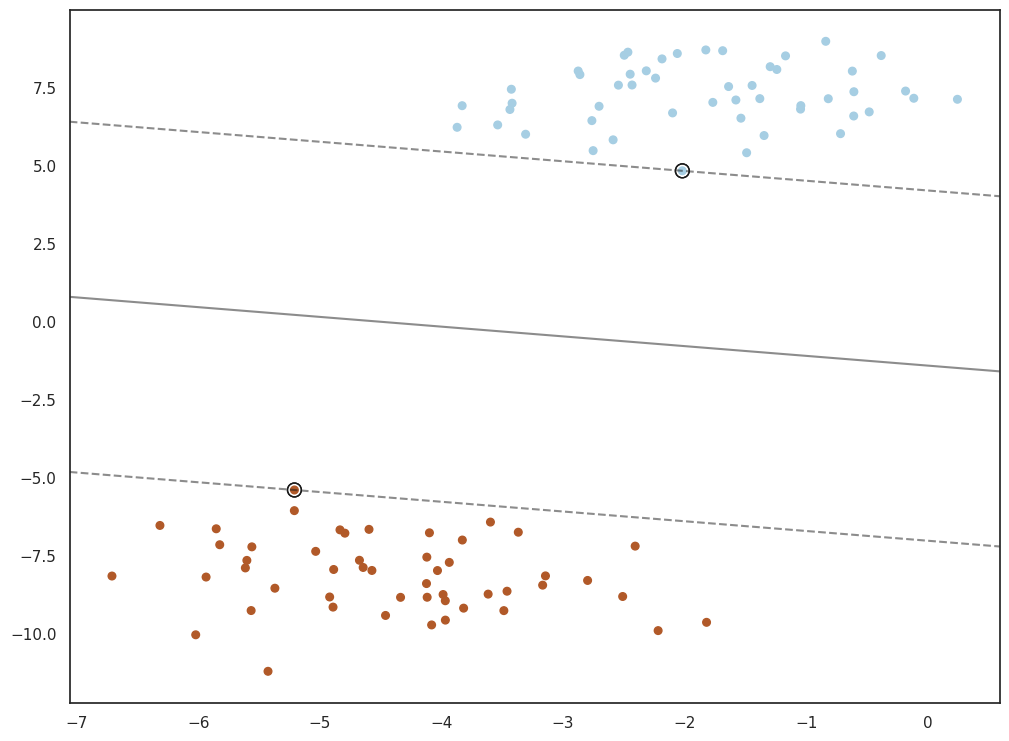

In [ ]:
# Train an SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)


# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# Highlight the support vectors with a circle around them
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           facecolors='none', edgecolors='k')

# Highlight the support vectors with a circle around them
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           facecolors='none', edgecolors='k')

plt.show()

## In SVM

we try to balance the margin distance with the number of correct classifications.

Hinge loss penalizes misclassification the further from the boundary and can be visualized here.

![image](https://cdn.hackernoon.com/images/wfOhdkoK2Ng95bY7s4ahmT5sb9N2-0wg3o8l.png)


IN SVM we try to minimize the objective function:

$J(w) = \frac{1}{2} ||w||^2 + C \sum_{i=1}^{N} \max(0, 1 - y_i(w \cdot x_i + b))$

THe margin is given as

$\text{margin} = \frac{2}{||w||}$

We can manipulate the tradeoff between the boundary width and the classification accuracy by modifying the $C$ parameter or Cost coefficient
The higher $C$, the higher the importance on classification.

### What if your dataset looks like this?

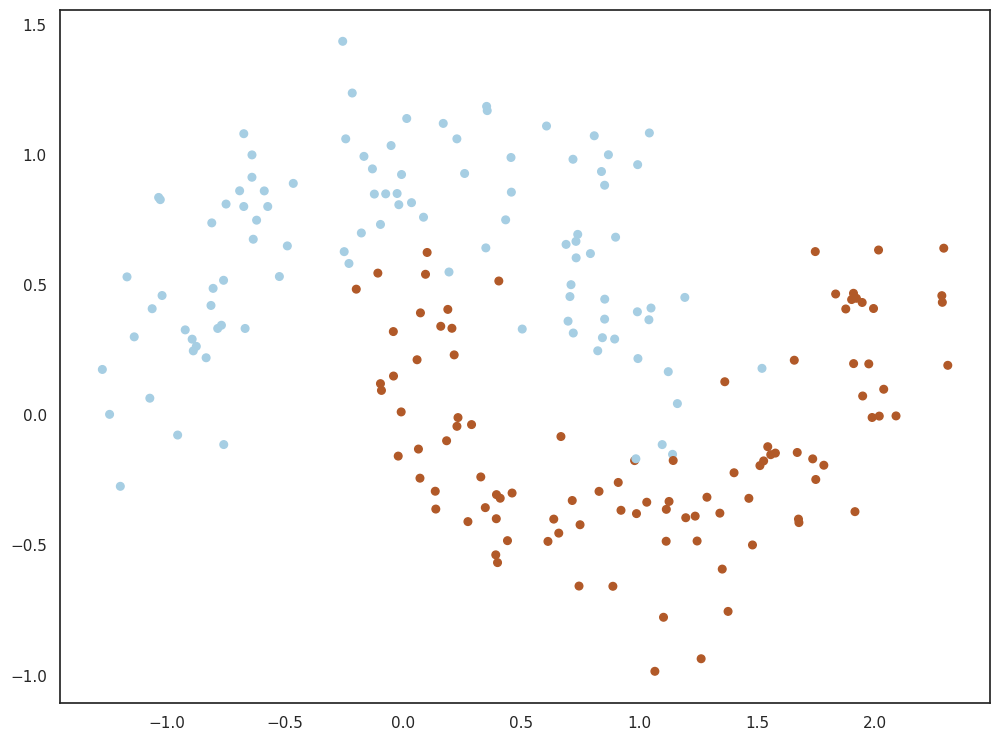

In [ ]:
# Generate a toy dataset (2D for visualization)
X, y = datasets.make_moons(n_samples=200, noise=0.2)

# Create the scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

plt.show()

### What is kernel function?

SVM algorithms use a set of mathematical functions that are defined as the kernel.

The job of the kernel is to transform input data. For linearly seperable data, we will use a linear kernel:

But for non-linearly seperable data, we will typically use a Radial Basis Function (RBF)

Example transformation:

![RPF](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*6nR_sMAK1OECelJd-TF_4Q.png)


An RBF is a functin whose value depends only on the distance between the input and some fixed point

$K(\mathbf{x}, \mathbf{z}) = \exp\left(-\gamma \|\mathbf{x} - \mathbf{z}\|^2\right)$


Here $\gamma$ defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’


THere are other kernel functions but we wont get into them here.

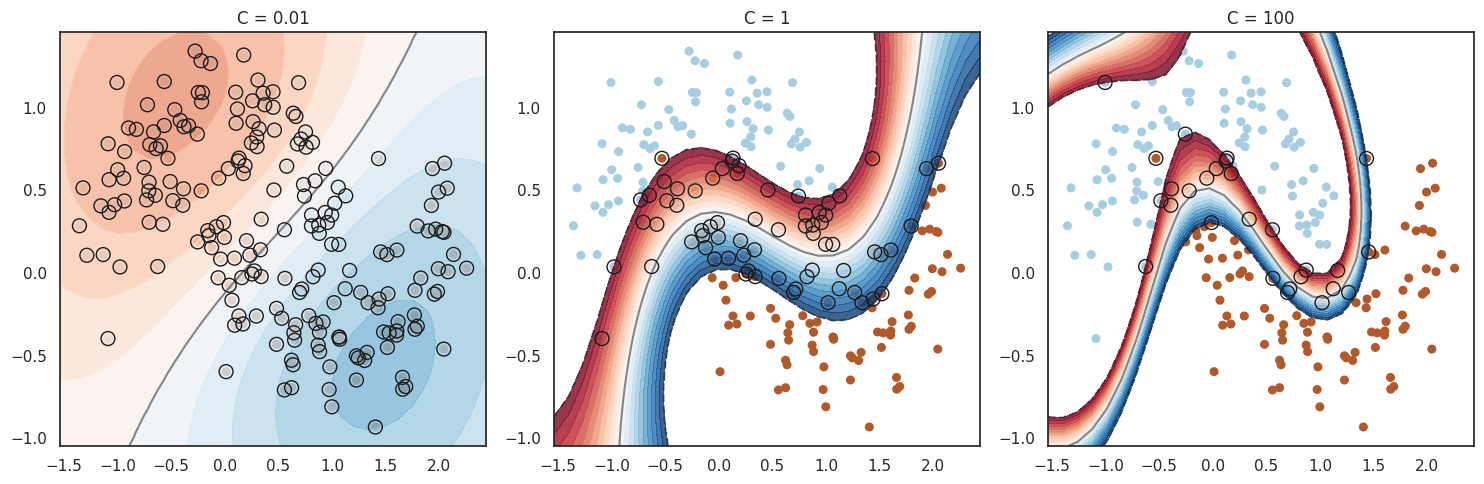

In [ ]:
# Generate a dataset with overlapping classes
X, y = datasets.make_moons(n_samples=200, noise=0.2, random_state=0)

# Define a function to plot decision boundary
def plot_decision_boundary(clf, X, y, ax):
    # Create the scatter plot
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Plot the decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contourf(XX, YY, Z, levels=np.arange(-1, 1.1, 0.1), cmap=plt.cm.RdBu, alpha=0.8)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight the support vectors with a circle around them
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')


# Different values of C
C_values = [0.01, 1, 100]
models = []

# Train SVMs with different C values
for C in C_values:
    clf = SVC(kernel='rbf', C=C, gamma='auto')
    clf.fit(X, y)
    models.append(clf)

# Plot each model's decision boundaries side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, model, C in zip(axes, models, C_values):
    plot_decision_boundary(model, X, y, ax)
    ax.set_title(f"C = {C}")

plt.tight_layout()
plt.show()


### So how does that work on the Cyber data set?

Let's use the same subset of the data.

In [ ]:
dfx = dfx = ddos_subset.drop(' Label', axis=1)
dfy = ddos_subset[' Label']
Xtrain, Xtest, ytrain, ytest = train_test_split(dfx, dfy,
                                                random_state=1)

We can see what parameters are available in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

 Once we know what hyperparameters we want to exmplore, we can automate the exploration of hyperparameter space by using grid search

In [ ]:
# import Grid Search
from sklearn.model_selection import GridSearchCV

# Set parameters to search over.
parameters = {'C':[0.01,0.1,1,10,100], 'gamma':[0.01,0.1,1,10]}
svc = SVC(kernel='rbf')                                                                            # Select Model
clf = GridSearchCV(svc, parameters)                                                         #
clf.fit(Xtrain, ytrain)

clf.best_params_

{'C': 1, 'gamma': 0.01}

In [ ]:
clf = make_pipeline(StandardScaler(), SVC(C=10, gamma=0.01, kernel='rbf'))
clf.fit(Xtrain, ytrain)
y_model = clf.predict(Xtest)
f1_score(ytest, y_model, average='weighted')

0.6171723957794304

# Assignment :  On Your Own

**You will create your first Machine Learning model.**

1. Setup Colab account
2. Use this notebook as a guide (available on Canvas)
2. Import some data
    * Try this first on something simple like Penguins or Irises.
    * (optional) Download a Cyber dataset and try with that one.
    * What issues did you run into? Can you solve them?
3. Get a working model running (k-NN, SVM, or one of the others)
4. Modify hyperparameters and see if you can improve upon initial performance.your results
    * Document your results
5. Submit your Jupyter Notebook
    * Don't worry if things aren't working. We will troubleshoot next class

*Note: You may work together on this work but each person must submit their own notebook.  If you work with someone else, you must indicate who you worked with*